In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import shap

In [4]:
# Loading the dataset
df = pd.read_csv('heart_attack_indonesia.csv')

In [5]:
# Data Analysis

print(df.head())
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())

   ID      State  Age HeartAttack  Gender  Cholesterol SmokingHabits  \
0   1  Pekanbaru   32          No    Male          179        Smoker   
1   2   Makassar   15         Yes  Female          201    Non-smoker   
2   3   Surabaya   41          No  Female          167    Non-smoker   
3   4     Malang   31          No    Male          287        Smoker   
4   5       Bali   19          No    Male          239        Smoker   

  PhysicalActivity   BMI Hypertension  ... EducationLevel MaritalStatus  \
0             High  19.1          Yes  ...      Secondary        Single   
1             High  26.9           No  ...      Secondary       Married   
2         Moderate  29.6          Yes  ...        Primary        Single   
3         Moderate  19.4           No  ...         Higher        Single   
4             High  18.5           No  ...      Secondary       Married   

  FamilyHistoryHeartDisease IncomeLevel HealthcareAccess SleepHours  \
0                        No      Middle      

In [6]:
# Encoding target variable
le = LabelEncoder()
df['HeartAttack'] = le.fit_transform(df['HeartAttack'])  # Yes -> 1, No -> 0

# Encoding categorical features
df_encoded = pd.get_dummies(df.drop(['ID', 'State'], axis=1), drop_first=True)

# Splitting data
X = df_encoded.drop('HeartAttack', axis=1)
y = df_encoded['HeartAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling numerical features
scaler = StandardScaler()
X_train[X_train.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(X_train[X_train.select_dtypes(include=['float64', 'int64']).columns])
X_test[X_test.select_dtypes(include=['float64', 'int64']).columns] = scaler.transform(X_test[X_test.select_dtypes(include=['float64', 'int64']).columns])


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  34.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  38.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  36.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  49.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  49.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  49.1s
[CV] END m

[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  43.9s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  44.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  16.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  16.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  16.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  23.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; tot

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  44.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  43.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  25.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  24.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  29.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  59.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  59.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  58.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 1.2min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total t

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  51.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  51.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  19.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  19.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  38.9s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  39.8s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  37.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  54.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total t

[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  45.3s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  45.6s
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best ROC-AUC for Random Forest: 0.5051421121847467
Random Forest Accuracy: 0.7497018631111806
Random Forest ROC-AUC: 0.4950602628541584

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     38348
           1       0.00      0.00      0.00     12803

    accuracy                           0.75     51151
   macro avg       0.37      0.50      0.43     51151
weighted avg       0.56      0.75      0.64     51151



C:\Users\jun\anaconda3\envs\env2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jun\anaconda3\envs\env2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jun\anaconda3\envs\env2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


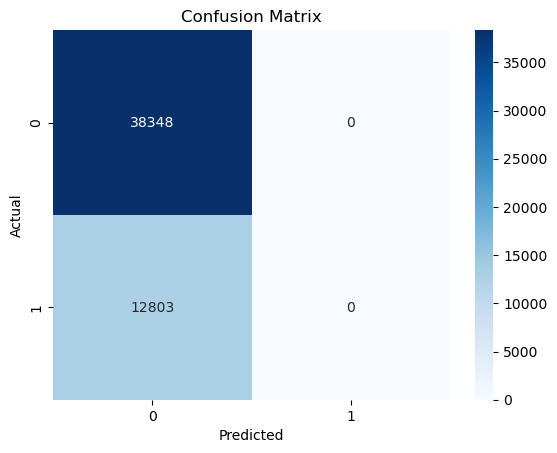

In [7]:
# Applying Hyperparameter Tuning for Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='roc_auc', cv=3, verbose=2)
rf_grid_search.fit(X_train, y_train)

print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best ROC-AUC for Random Forest:", rf_grid_search.best_score_)

# Training the best Random Forest model
rf_best = rf_grid_search.best_estimator_
rf_best.fit(X_train, y_train)

# Evaluating the model
y_pred = rf_best.predict(X_test)
y_prob = rf_best.predict_proba(X_test)[:, 1]
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


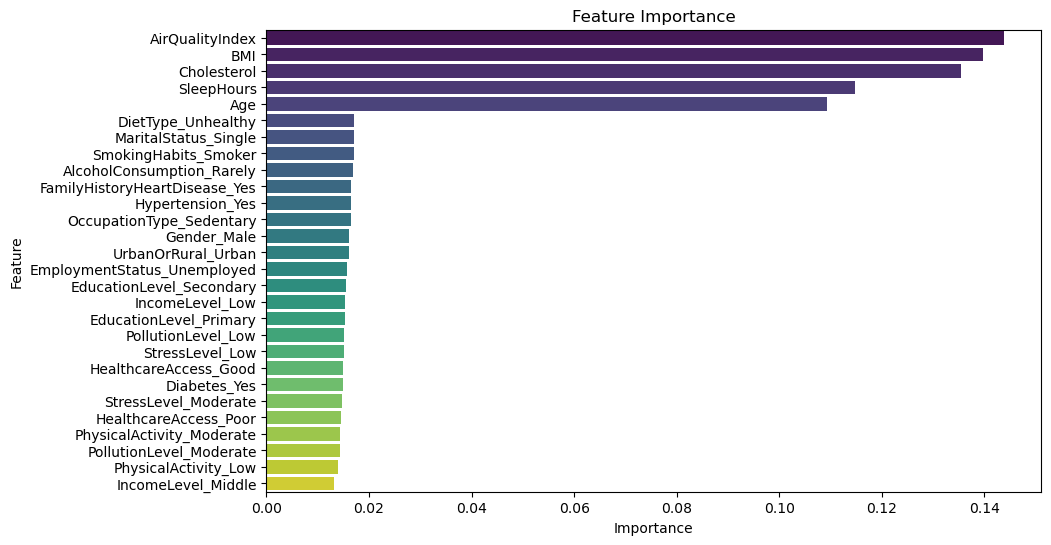

In [8]:
# Feature Importance
importances = rf_best.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance")
plt.show()

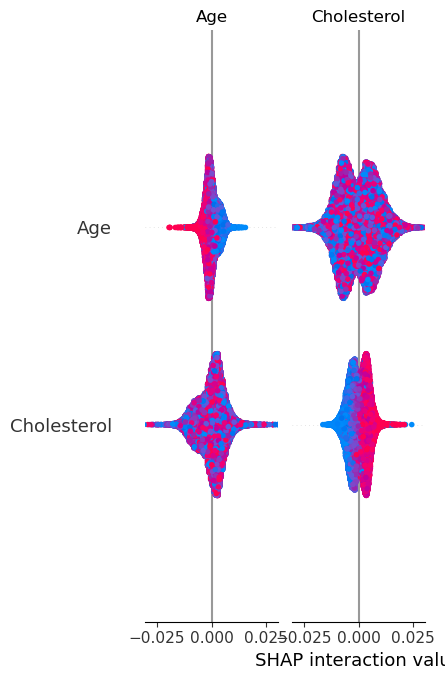

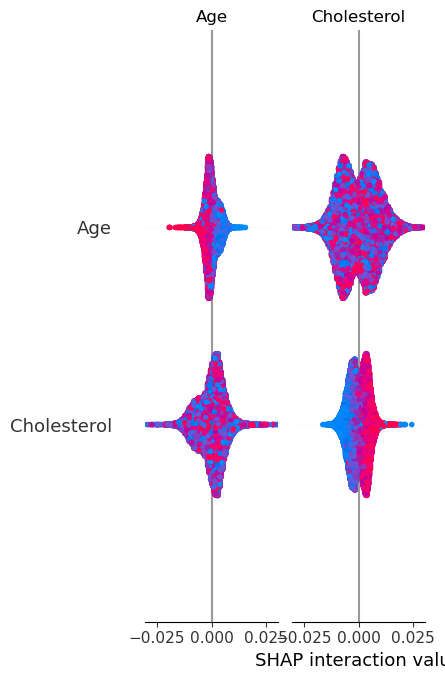

In [20]:
# SHAP Analysis
explainer = shap.TreeExplainer(rf_best)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [22]:
import lime
import lime.lime_tabular

In [23]:
# LIME Analysis
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    mode='classification',
    training_labels=y_train,
    class_names=['No Heart Attack', 'Heart Attack'],
    feature_names=X.columns,
    categorical_features=[X.columns.get_loc(col) for col in X.select_dtypes(include=['uint8']).columns],
    random_state=42
)

# Explain a single prediction
sample_idx = 0
sample = X_test.iloc[sample_idx].values
lime_exp = lime_explainer.explain_instance(data_row=sample, predict_fn=rf_best.predict_proba)

# Display LIME results
lime_exp.show_in_notebook(show_table=True, show_all=False)

C:\Users\jun\anaconda3\envs\env2\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
